In [2]:
#Importing all the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
!pip install folium
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

     |████████████████████████████████| 102kB 7.5MB/s ta 0:00:011


In [7]:
# The code was removed by Watson Studio for sharing.

,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892


In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

Creating 'Population' and 'Income' dataframe from the main dataframe

In [9]:
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])

In [10]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [12]:

bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])

In [13]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [10]:
bangalore_income.to_csv('data/income_dataset.csv')

In [14]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.962339620312497 77.60175294687502


In [15]:
CLIENT_ID = 'CCCZKBTFDJQKX1YL3FWZLA0YGDC0THW05MB410U3DE5K1R5V'
CLIENT_SECRET = 'ICWAZXEXE130UD2G2AMHL1ONA0QNFT125PCI4WSNVMMTJQKR'
VERSION = '20200510'
LIMIT = 150

In [16]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()

In [17]:
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [18]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [19]:
borough_colors

{'Central': '#905D03',
 'Eastern': '#639492',
 'NorthEastern': '#FE9A47',
 'Northern': '#A106C1',
 'SouthEastern': '#01416D',
 'Southern': '#93F366',
 'SouthernSuburbs': '#8FAECC',
 'Western': '#AB8EEC'}

In [20]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [21]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)

In [22]:
bangalore_map

# Exploring bangalore Neighborhoods using FourSquare API

In [23]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [25]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [26]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  590


In [27]:
bangalore_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
2,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
3,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
4,Cantonment area,Central,12.972442,77.580643,Kamat Yatrinivas,12.975985,77.578125,Indian Restaurant


In [28]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       111
Café                     28
Fast Food Restaurant     26
Bakery                   24
Ice Cream Shop           20
Department Store         19
Pizza Place              19
Coffee Shop              16
Chinese Restaurant       14
Restaurant               11
Name: Neighborhood, dtype: int64

In [29]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  132


### Getting number of venues per neighborhood

In [30]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [31]:
individual_bangalore_venue_count

Borough
Borough         Neighborhood                 
Central         Cantonment area             5
                Domlur                     11
                Indiranagar                65
                Jeevanbheemanagar           5
                Malleswaram                 6
                Pete area                   5
                Rajajinagar                14
                Sadashivanagar             19
                Seshadripuram               9
                Shivajinagar               10
                Ulsoor                      4
                Vasanth Nagar              28
Eastern         Bellandur                  22
                CV Raman Nagar              6
                Hoodi                       3
                Krishnarajapuram            3
                Mahadevapura                5
                Marathahalli                9
                Varthur                     1
                Whitefield                 10
NorthEastern    Banaswadi                   6
                HBR Layout                  4
                Horamavu                    1
                Kammanahalli               11
                Lingarajapuram              2
                Ramamurthy Nagar            4
Northern        Hebbal                      7
                Jalahalli                   3
                Mathikere                  11
                R. T. Nagar                 7
...                                       ...
SouthEastern    BTM Layout                 36
                Bommanahalli                4
                Bommasandra                 1
                Electronic City             6
                HSR Layout                  8
                Koramangala                 6
                Madiwala                   21
Southern        Banashankari               10
                Basavanagudi               14
                Girinagar                   4
                J. P. Nagar                27
                Jayanagar                  14
                Kumaraswamy Layout         10
                Padmanabhanagar             4
                Uttarahalli                11
SouthernSuburbs Anjanapura                  1
                Arekere                    28
                Begur                       4
                Gottigere                   6
                Hulimavu                    4
                Kothnur                     4
Western         Basaveshwaranagar          18
                Kamakshipalya               3
                Kengeri                     5
                Mahalakshmi Layout         11
                Nagarbhavi                  7
                Nandini Layout              1
                Nayandahalli                2
                Rajarajeshwari Nagar        6
                Vijayanagar                 4

[62 rows x 1 columns]

In [32]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [33]:
individual_bangalore_venue_count.reset_index(inplace=True)

In [34]:
individual_bangalore_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,5
1,Central,Domlur,11
2,Central,Indiranagar,65
3,Central,Jeevanbheemanagar,5
4,Central,Malleswaram,6
5,Central,Pete area,5
6,Central,Rajajinagar,14
7,Central,Sadashivanagar,19
8,Central,Seshadripuram,9
9,Central,Shivajinagar,10


[Text(0, 0, 'Cantonment area'),
 Text(0, 0, 'Domlur'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jeevanbheemanagar'),
 Text(0, 0, 'Malleswaram'),
 Text(0, 0, 'Pete area'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Sadashivanagar'),
 Text(0, 0, 'Seshadripuram'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Ulsoor'),
 Text(0, 0, 'Vasanth Nagar'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'CV Raman Nagar'),
 Text(0, 0, 'Hoodi'),
 Text(0, 0, 'Krishnarajapuram'),
 Text(0, 0, 'Mahadevapura'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'Varthur'),
 Text(0, 0, 'Whitefield'),
 Text(0, 0, 'Banaswadi'),
 Text(0, 0, 'HBR Layout'),
 Text(0, 0, 'Horamavu'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Lingarajapuram'),
 Text(0, 0, 'Ramamurthy Nagar'),
 Text(0, 0, 'Hebbal'),
 Text(0, 0, 'Jalahalli'),
 Text(0, 0, 'Mathikere'),
 Text(0, 0, 'R. T. Nagar'),
 Text(0, 0, 'Yelahanka'),
 Text(0, 0, 'Yeshwanthpur'),
 Text(0, 0, 'BTM Layout'),
 Text(0, 0, 'Bommanahalli'),
 Text(0, 0, 'Bommasandra'),
 Text(0, 0, 'Electronic 

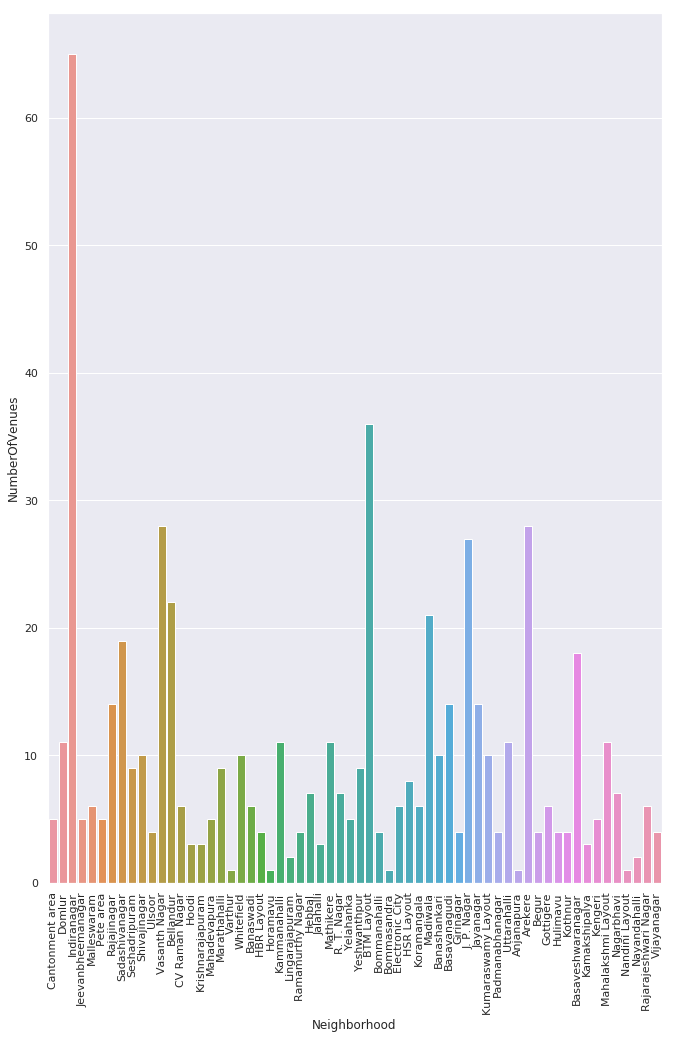

In [35]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

From the above graph we can see that inderanagar has most number of venues and soo on...

## Exploring Whitefield venues

In [36]:
bangalore_venues[bangalore_venues['Neighborhood']=='Whitefield']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
230,Whitefield,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
231,Whitefield,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
232,Whitefield,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
233,Whitefield,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
234,Whitefield,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
235,Whitefield,Eastern,12.9698,77.7499,Punjabi Kitchen,12.968100,77.749804,Diner
236,Whitefield,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
237,Whitefield,Eastern,12.9698,77.7499,burgundy restaurant,12.966812,77.751380,Swiss Restaurant
238,Whitefield,Eastern,12.9698,77.7499,Calvin's,12.973117,77.749514,Café
239,Whitefield,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café


# One hot encoding for letting us to compare different venues based on some common scale


In [37]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])

In [38]:
bangalore_venues_onehot

,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Andhra Restaurant,Venue Category_Arcade,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Andhra Restaurant,Venue Category_Arcade,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store
0,Anjanapura,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,Arekere,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,BTM Layout,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.055556,0.000000,0.000000,0.000000
3,Banashankari,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,Banaswadi,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.166667,0.000000,0.000000,0.000000
5,Basavanagudi,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6,Basaveshwaranagar,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,Begur,0.250000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,Bellandur,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
9,Bommanahalli,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [42]:
number_of_top_venues = 5

In [43]:
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Anjanapura ---------
                                  Venue  Frequency
0                    Venue Category_ATM        1.0
1     Venue Category_Miscellaneous Shop        0.0
2  Venue Category_Performing Arts Venue        0.0
3            Venue Category_Pastry Shop        0.0
4                   Venue Category_Park        0.0


--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.21
1  Venue Category_Sporting Goods Shop       0.14
2     Venue Category_Department Store       0.07
3   Venue Category_Mughlai Restaurant       0.07
4          Venue Category_Pizza Place       0.07


--------- BTM Layout ---------
                              Venue  Frequency
0  Venue Category_Indian Restaurant       0.19
1     Venue Category_Ice Cream Shop       0.08
2        Venue Category_Snack Place       0.08
3        Venue Category_Pizza Place       0.06
4        Venue Category_Coffee Shop       0.06


--------- Banashankari

Frequency of each neighborhood and its top 5 venues can be known. This is very important is we can analyze top neighborhoods with most busy restaurants

In [44]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [45]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anjanapura,Venue Category_ATM,Venue Category_French Restaurant,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Falafel Restaurant
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Breakfast Spot,Venue Category_Bus Line,Venue Category_Liquor Store,Venue Category_Chinese Restaurant,Venue Category_Fast Food Restaurant
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Fast Food Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Chinese Restaurant,Venue Category_Sandwich Place,Venue Category_Pizza Place,Venue Category_Bakery
3,Banashankari,Venue Category_Café,Venue Category_Park,Venue Category_Accessories Store,Venue Category_Miscellaneous Shop,Venue Category_Motorcycle Shop,Venue Category_Indian Restaurant,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Clothing Store,Venue Category_Electronics Store
4,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Pharmacy,Venue Category_Bakery,Venue Category_Convenience Store,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Hotel,Venue Category_Food Court,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop


In [46]:
neighborhoods_venues_sorted.shape

(62, 11)

## Next challenge is to find the optimal k value for clustering and we do it using the elbow method

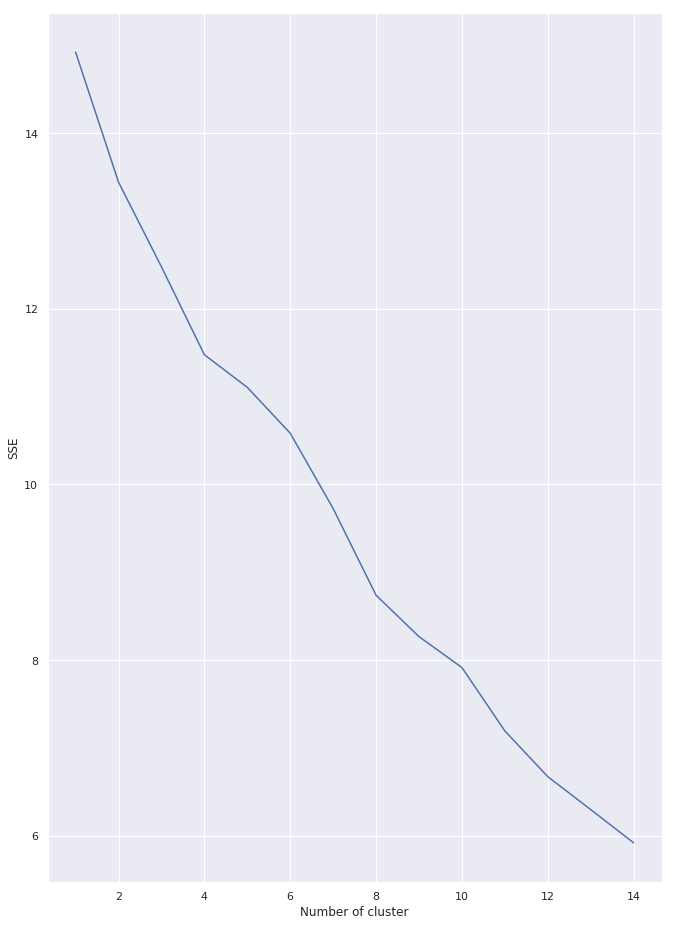

In [47]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### From the above graph, we can see the optimal value for cluster is 5.

In [48]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [49]:
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [50]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_

In [51]:
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    15
1    22
2     8
3    12
4     5
Name: Neighborhood, dtype: int64

In [52]:
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Accessories Store', 'Venue Category_Andhra Restaurant',
       'Venue Category_Arcade', 'Venue Category_Art Museum',
       'Venue Category_Arts & Crafts Store', 'Venue Category_Asian Restaurant',
       'Venue Category_Athletics & Sports', 'Venue Category_Auto Garage',
       ...
       'Venue Category_Tex-Mex Restaurant', 'Venue Category_Toll Plaza',
       'Venue Category_Toy / Game Store', 'Venue Category_Train Station',
       'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Wine Bar',
       'Venue Category_Women's Store', 'Cluster'],
      dtype='object', length=134)

In [53]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')

In [54]:
neighborhoods_venues_sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Cluster
0,Anjanapura,Venue Category_ATM,Venue Category_French Restaurant,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Department Store,Venue Category_Pizza Place,Venue Category_Mughlai Restaurant,Venue Category_Breakfast Spot,Venue Category_Bus Line,Venue Category_Liquor Store,Venue Category_Chinese Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Snack Place,Venue Category_Fast Food Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Coffee Shop,Venue Category_Chinese Restaurant,Venue Category_Sandwich Place,Venue Category_Pizza Place,...,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,3
3,Banashankari,Venue Category_Café,Venue Category_Park,Venue Category_Accessories Store,Venue Category_Miscellaneous Shop,Venue Category_Motorcycle Shop,Venue Category_Indian Restaurant,Venue Category_North Indian Restaurant,Venue Category_Pizza Place,Venue Category_Clothing Store,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,3


In [55]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')

In [56]:
# create map
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

In [57]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       

In [58]:
map_clusters

## Finding similar locations based on user input (recommending location)
#### We need to analyze factors such as population and Income to recommend.

In [59]:
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [60]:
bangalore_population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [61]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [62]:
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099792,0.293051
1,Central,Domlur,56837.022198,0.879225
2,Central,Indiranagar,41991.817435,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063892,0.824047


In [63]:
bangalore_venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Andhra Restaurant,Venue Category_Arcade,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,...,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store,Cluster
0,Anjanapura,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


#### recommending Veg restaurants

In [64]:
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Accessories Store,Venue Category_Andhra Restaurant,Venue Category_Arcade,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,...,Venue Category_Tea Room,Venue Category_Tex-Mex Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Wine Bar,Venue Category_Women's Store
0,Anjanapura,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arekere,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,BTM Layout,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
3,Banashankari,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Banaswadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [65]:
bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     0
1     0
2     2
3     0
4     1
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    2
25    0
26    0
27    0
28    0
29    0
     ..
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    1
44    0
45    0
46    0
47    0
48    2
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    1
58    0
59    0
60    0
61    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 62, dtype: uint8

In [66]:
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [67]:
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [68]:
bangalore_veg.head()

,Neighborhood,NumberOfVegRestaurants
0,Anjanapura,0
1,Arekere,0
2,BTM Layout,2
3,Banashankari,0
4,Banaswadi,1


In [69]:
bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))

In [70]:
bangalore_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Anjanapura,0,1.0
1,Arekere,0,1.0
2,BTM Layout,2,0.0
3,Banashankari,0,1.0
4,Banaswadi,1,0.5
5,Basavanagudi,0,1.0
6,Basaveshwaranagar,0,1.0
7,Begur,0,1.0
8,Bellandur,0,1.0
9,Bommanahalli,0,1.0


In [71]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

### Building a target neighborhood by providing a sample restaurant : say ' Whitefield '

In [72]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Whitefield']

In [73]:
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Wine Bar,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,566,Whitefield,Venue Category_Café,Venue Category_Swiss Restaurant,Venue Category_Bakery,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Diner,Venue Category_Gym / Fitness Center,Venue Category_Kerala Restaurant,...,0.0,0.0,0,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
1,567,Whitefield,Venue Category_Café,Venue Category_Swiss Restaurant,Venue Category_Bakery,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Diner,Venue Category_Gym / Fitness Center,Venue Category_Kerala Restaurant,...,0.0,0.0,0,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
2,568,Whitefield,Venue Category_Café,Venue Category_Swiss Restaurant,Venue Category_Bakery,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Diner,Venue Category_Gym / Fitness Center,Venue Category_Kerala Restaurant,...,0.0,0.0,0,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
3,569,Whitefield,Venue Category_Café,Venue Category_Swiss Restaurant,Venue Category_Bakery,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Diner,Venue Category_Gym / Fitness Center,Venue Category_Kerala Restaurant,...,0.0,0.0,0,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
4,570,Whitefield,Venue Category_Café,Venue Category_Swiss Restaurant,Venue Category_Bakery,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Diner,Venue Category_Gym / Fitness Center,Venue Category_Kerala Restaurant,...,0.0,0.0,0,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
5,571,Whitefield,Venue Category_Café,Venue Category_Swiss Restaurant,Venue Category_Bakery,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Diner,Venue Category_Gym / Fitness Center,Venue Category_Kerala Restaurant,...,0.0,0.0,0,Eastern,12.9698,77.7499,Punjabi Kitchen,12.968100,77.749804,Diner
6,572,Whitefield,Venue Category_Café,Venue Category_Swiss Restaurant,Venue Category_Bakery,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Diner,Venue Category_Gym / Fitness Center,Venue Category_Kerala Restaurant,...,0.0,0.0,0,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
7,573,Whitefield,Venue Category_Café,Venue Category_Swiss Restaurant,Venue Category_Bakery,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Diner,Venue Category_Gym / Fitness Center,Venue Category_Kerala Restaurant,...,0.0,0.0,0,Eastern,12.9698,77.7499,burgundy restaurant,12.966812,77.751380,Swiss Restaurant
8,574,Whitefield,Venue Category_Café,Venue Category_Swiss Restaurant,Venue Category_Bakery,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Diner,Venue Category_Gym / Fitness Center,Venue Category_Kerala Restaurant,...,0.0,0.0,0,Eastern,12.9698,77.7499,Calvin's,12.973117,77.749514,Café
9,575,Whitefield,Venue Category_Café,Venue Category_Swiss Restaurant,Venue Category_Bakery,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Diner,Venue Category_Gym / Fitness Center,Venue Category_Kerala Restaurant,...,0.0,0.0,0,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café


In [74]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [75]:
target_cluster

0

In [76]:
print("The target cluster is : ",target_cluster)

The target cluster is :  0


In [77]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Wine Bar,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
166,Electronic City,Venue Category_Snack Place,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Falafel Restaurant,Venue Category_Food & Drink Shop,Venue Category_Flea Market,...,0.0,0.0,0,SouthEastern,12.840711,77.676369,Global Living Emporio,12.841080,77.675598,Furniture / Home Store
167,Electronic City,Venue Category_Snack Place,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Falafel Restaurant,Venue Category_Food & Drink Shop,Venue Category_Flea Market,...,0.0,0.0,0,SouthEastern,12.840711,77.676369,Huskur Gate,12.839797,77.677198,Bus Stop
168,Electronic City,Venue Category_Snack Place,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Falafel Restaurant,Venue Category_Food & Drink Shop,Venue Category_Flea Market,...,0.0,0.0,0,SouthEastern,12.840711,77.676369,e-Toll Gate,12.842121,77.675325,Toll Plaza
169,Electronic City,Venue Category_Snack Place,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Falafel Restaurant,Venue Category_Food & Drink Shop,Venue Category_Flea Market,...,0.0,0.0,0,SouthEastern,12.840711,77.676369,give me 5,12.839693,77.676980,Snack Place
170,Electronic City,Venue Category_Snack Place,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Falafel Restaurant,Venue Category_Food & Drink Shop,Venue Category_Flea Market,...,0.0,0.0,0,SouthEastern,12.840711,77.676369,Audi Bengaluru Service,12.842437,77.675649,Auto Garage


In [78]:
print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))

There are 97 neighborhoods which has similar characteristics to Whitefield.


In [79]:
possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Wine Bar,Venue Category_Women's Store,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,166,Electronic City,Venue Category_Snack Place,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Falafel Restaurant,Venue Category_Food & Drink Shop,...,0.0,0.0,0,SouthEastern,12.840711,77.676369,Global Living Emporio,12.841080,77.675598,Furniture / Home Store
1,167,Electronic City,Venue Category_Snack Place,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Falafel Restaurant,Venue Category_Food & Drink Shop,...,0.0,0.0,0,SouthEastern,12.840711,77.676369,Huskur Gate,12.839797,77.677198,Bus Stop
2,168,Electronic City,Venue Category_Snack Place,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Falafel Restaurant,Venue Category_Food & Drink Shop,...,0.0,0.0,0,SouthEastern,12.840711,77.676369,e-Toll Gate,12.842121,77.675325,Toll Plaza
3,169,Electronic City,Venue Category_Snack Place,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Falafel Restaurant,Venue Category_Food & Drink Shop,...,0.0,0.0,0,SouthEastern,12.840711,77.676369,give me 5,12.839693,77.676980,Snack Place
4,170,Electronic City,Venue Category_Snack Place,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Falafel Restaurant,Venue Category_Food & Drink Shop,...,0.0,0.0,0,SouthEastern,12.840711,77.676369,Audi Bengaluru Service,12.842437,77.675649,Auto Garage


In [80]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


### Now we need to create ranking by combining population and income factors as well?

In [81]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [82]:
possible_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Electronic City,Venue Category_Snack Place,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Falafel Restaurant,Venue Category_Food & Drink Shop,Venue Category_Flea Market,...,Global Living Emporio,12.841080,77.675598,Furniture / Home Store,781260,0.794275,8350.934536,0.129182,0,1.0
1,Electronic City,Venue Category_Snack Place,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Falafel Restaurant,Venue Category_Food & Drink Shop,Venue Category_Flea Market,...,Huskur Gate,12.839797,77.677198,Bus Stop,781260,0.794275,8350.934536,0.129182,0,1.0
2,Electronic City,Venue Category_Snack Place,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Falafel Restaurant,Venue Category_Food & Drink Shop,Venue Category_Flea Market,...,e-Toll Gate,12.842121,77.675325,Toll Plaza,781260,0.794275,8350.934536,0.129182,0,1.0
3,Electronic City,Venue Category_Snack Place,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Falafel Restaurant,Venue Category_Food & Drink Shop,Venue Category_Flea Market,...,give me 5,12.839693,77.676980,Snack Place,781260,0.794275,8350.934536,0.129182,0,1.0
4,Electronic City,Venue Category_Snack Place,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,Venue Category_Toll Plaza,Venue Category_Bus Stop,Venue Category_Auto Garage,Venue Category_Falafel Restaurant,Venue Category_Food & Drink Shop,Venue Category_Flea Market,...,Audi Bengaluru Service,12.842437,77.675649,Auto Garage,781260,0.794275,8350.934536,0.129182,0,1.0


In [83]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [84]:
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Kamakshipalya,Venue Category_ATM,Venue Category_Hotel,Venue Category_South Indian Restaurant,Venue Category_Hotel Bar,Venue Category_Hookah Bar,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,...,12.985725,77.527079,South Indian Restaurant,968497,0.984631,39132.402990,0.605348,0,1.0,0.804187
1,Kamakshipalya,Venue Category_ATM,Venue Category_Hotel,Venue Category_South Indian Restaurant,Venue Category_Hotel Bar,Venue Category_Hookah Bar,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,...,12.989698,77.528215,Hotel,968497,0.984631,39132.402990,0.605348,0,1.0,0.804187
2,Kamakshipalya,Venue Category_ATM,Venue Category_Hotel,Venue Category_South Indian Restaurant,Venue Category_Hotel Bar,Venue Category_Hookah Bar,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Dim Sum Restaurant,Venue Category_Diner,...,12.987290,77.526848,ATM,968497,0.984631,39132.402990,0.605348,0,1.0,0.804187
3,HBR Layout,Venue Category_Coffee Shop,Venue Category_North Indian Restaurant,Venue Category_Road,Venue Category_Café,Venue Category_Women's Store,Venue Category_Electronics Store,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,...,13.037118,77.628266,Café,822101,0.835796,43625.383678,0.674851,0,1.0,0.754096
4,HBR Layout,Venue Category_Coffee Shop,Venue Category_North Indian Restaurant,Venue Category_Road,Venue Category_Café,Venue Category_Women's Store,Venue Category_Electronics Store,Venue Category_Flea Market,Venue Category_Fish & Chips Shop,Venue Category_Fast Food Restaurant,...,13.034016,77.628998,North Indian Restaurant,822101,0.835796,43625.383678,0.674851,0,1.0,0.754096


In [85]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [86]:
top3_df = pd.DataFrame(top3).reset_index()

In [87]:
top3_df.head(3)

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Electronic City,Venue Category_Snack Place,Venue Category_Outlet Store,Venue Category_Furniture / Home Store,[0.5423513638809381]
1,HBR Layout,Venue Category_Coffee Shop,Venue Category_North Indian Restaurant,Venue Category_Road,[0.7540959810582033]
2,Kamakshipalya,Venue Category_ATM,Venue Category_Hotel,Venue Category_South Indian Restaurant,[0.80418735993893]


#### Here, according the data, we see that Electronic City,HBR Layout and kamakshipalya' are top 3 neighborhoods to find similar food to whitefield restaurant's veg food !
#### Here our model will recommend these neighborneeds and top 3 common venues to visit.

# Thank you for reviewing !